In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/diamond.csv')

df.head(5)

,cut,color,clarity,carat,depth,table,price,x,z,y
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58



# Data description


### Copied from source of dataset:
Content price price in US dollars ($326--$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

https://www.openml.org/search?type=data&sort=runs&id=42225&status=active

# Endcoding

### Encoding color:

We will encode them so high values = better and low values = worse

In [3]:
df['color'].unique()

array(['E', 'F', 'H', 'G', 'J', 'I', 'D'], dtype=object)

In [4]:
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
df['color'] = df['color'].map(color_mapping)


### Encoding Cut Quality

From the source describtion we are told that the cut quality is ordered from Fair to ideal

Fair, Good, Very Good, Premium, Ideal

In [5]:
df['cut'].unique()

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [6]:
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
df['cut'] = df['cut'].map(cut_mapping)


### Encoding clarity

(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [7]:
df['clarity'].unique()

array(['VS2', 'SI2', 'SI1', 'I1', 'VVS1', 'VS1', 'IF', 'VVS2'],
      dtype=object)

In [8]:
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'] = df['clarity'].map(clarity_mapping)


In [9]:
df[['cut', 'clarity', 'color']].head()

,cut,clarity,color
0,1,4,6
1,1,2,6
2,1,2,5
3,1,4,5
4,1,4,5


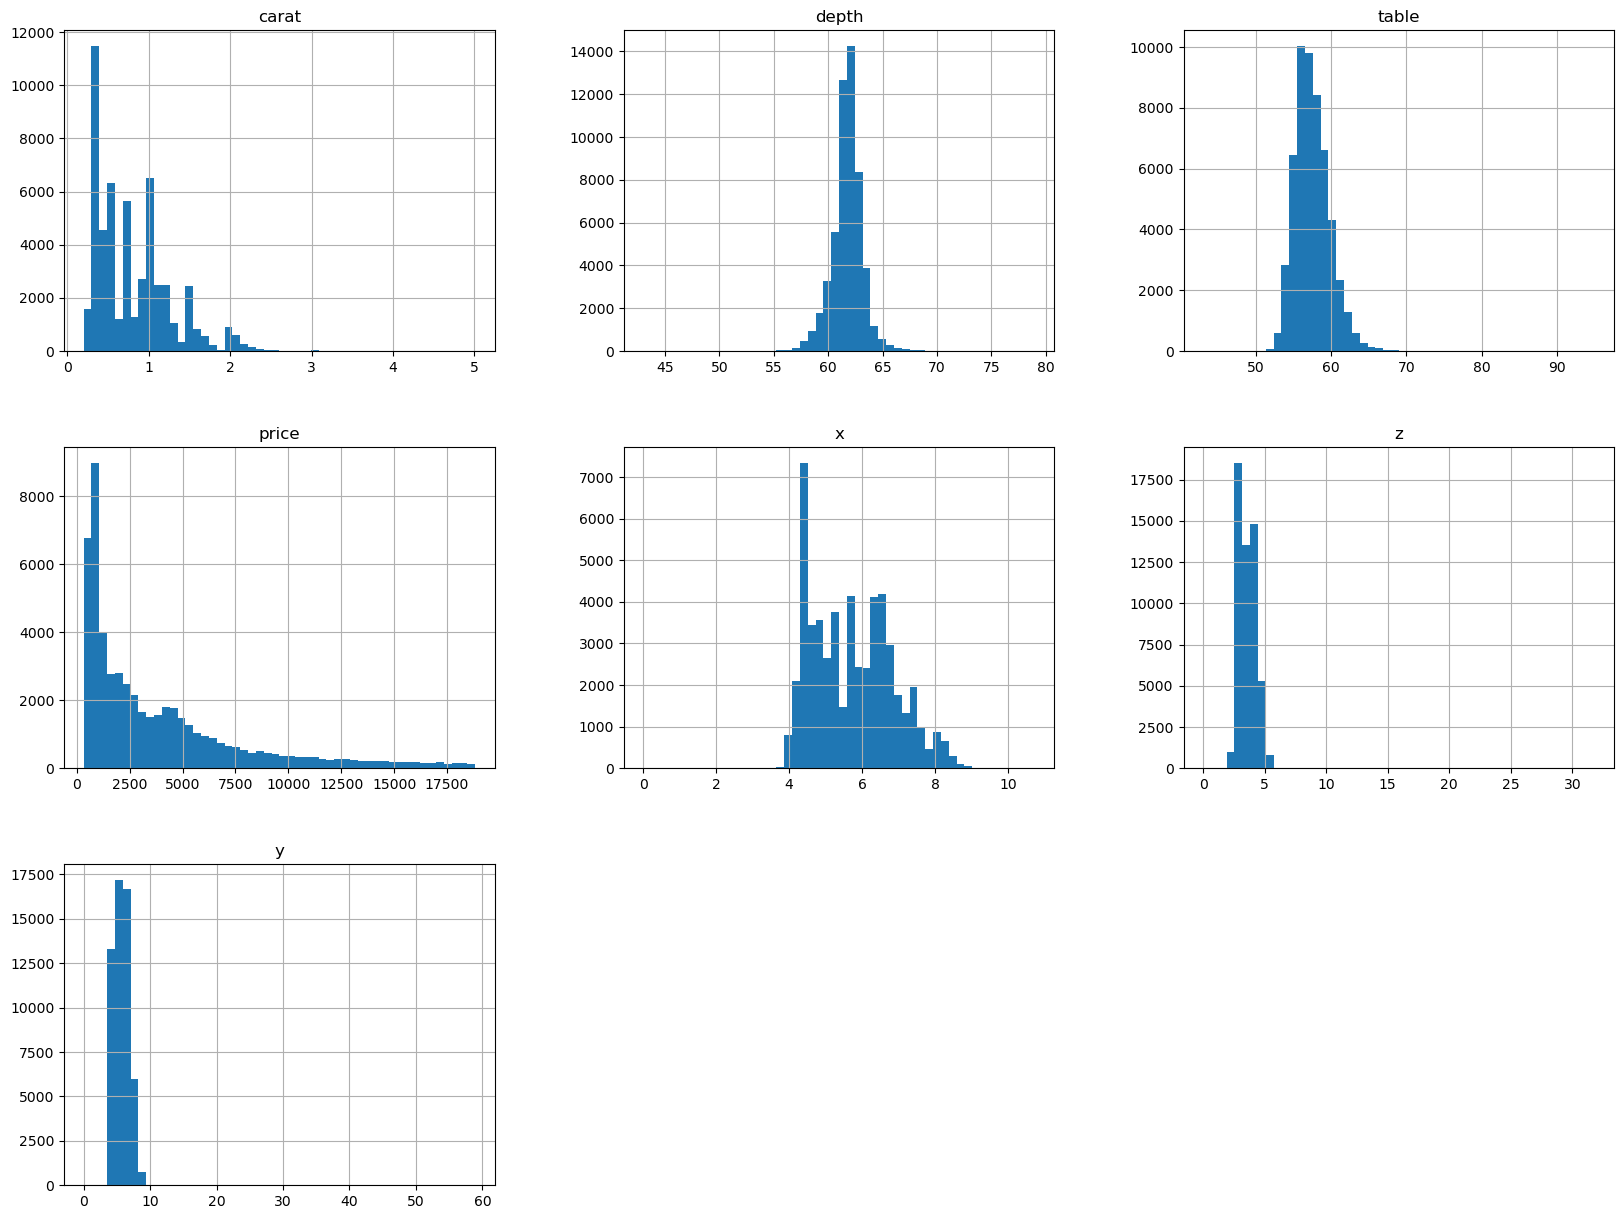

In [10]:
import matplotlib.pyplot as plt

df[['carat', 'depth', 'table', 'price', 'x', 'z','y']].hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
print(df.describe().to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & cut & color & clarity & carat & depth & table & price & x & z & y \\
\midrule
count & 53940.000000 & 53940.000000 & 53940.000000 & 53940.000000 & 53940.000000 & 53940.000000 & 53940.000000 & 53940.000000 & 53940.000000 & 53940.000000 \\
mean & 3.904097 & 4.405803 & 4.051020 & 0.797940 & 61.749405 & 57.457184 & 3932.799722 & 5.731157 & 3.538734 & 5.734526 \\
std & 1.116600 & 1.701105 & 1.647136 & 0.474011 & 1.432621 & 2.234491 & 3989.439738 & 1.121761 & 0.705699 & 1.142135 \\
min & 1.000000 & 1.000000 & 1.000000 & 0.200000 & 43.000000 & 43.000000 & 326.000000 & 0.000000 & 0.000000 & 0.000000 \\
25% & 3.000000 & 3.000000 & 3.000000 & 0.400000 & 61.000000 & 56.000000 & 950.000000 & 4.710000 & 2.910000 & 4.720000 \\
50% & 4.000000 & 4.000000 & 4.000000 & 0.700000 & 61.800000 & 57.000000 & 2401.000000 & 5.700000 & 3.530000 & 5.710000 \\
75% & 5.000000 & 6.000000 & 5.000000 & 1.040000 & 62.500000 & 59.000000 & 5324.250000 & 6.540000 & 4.040000 & 6.540

# Transformation:

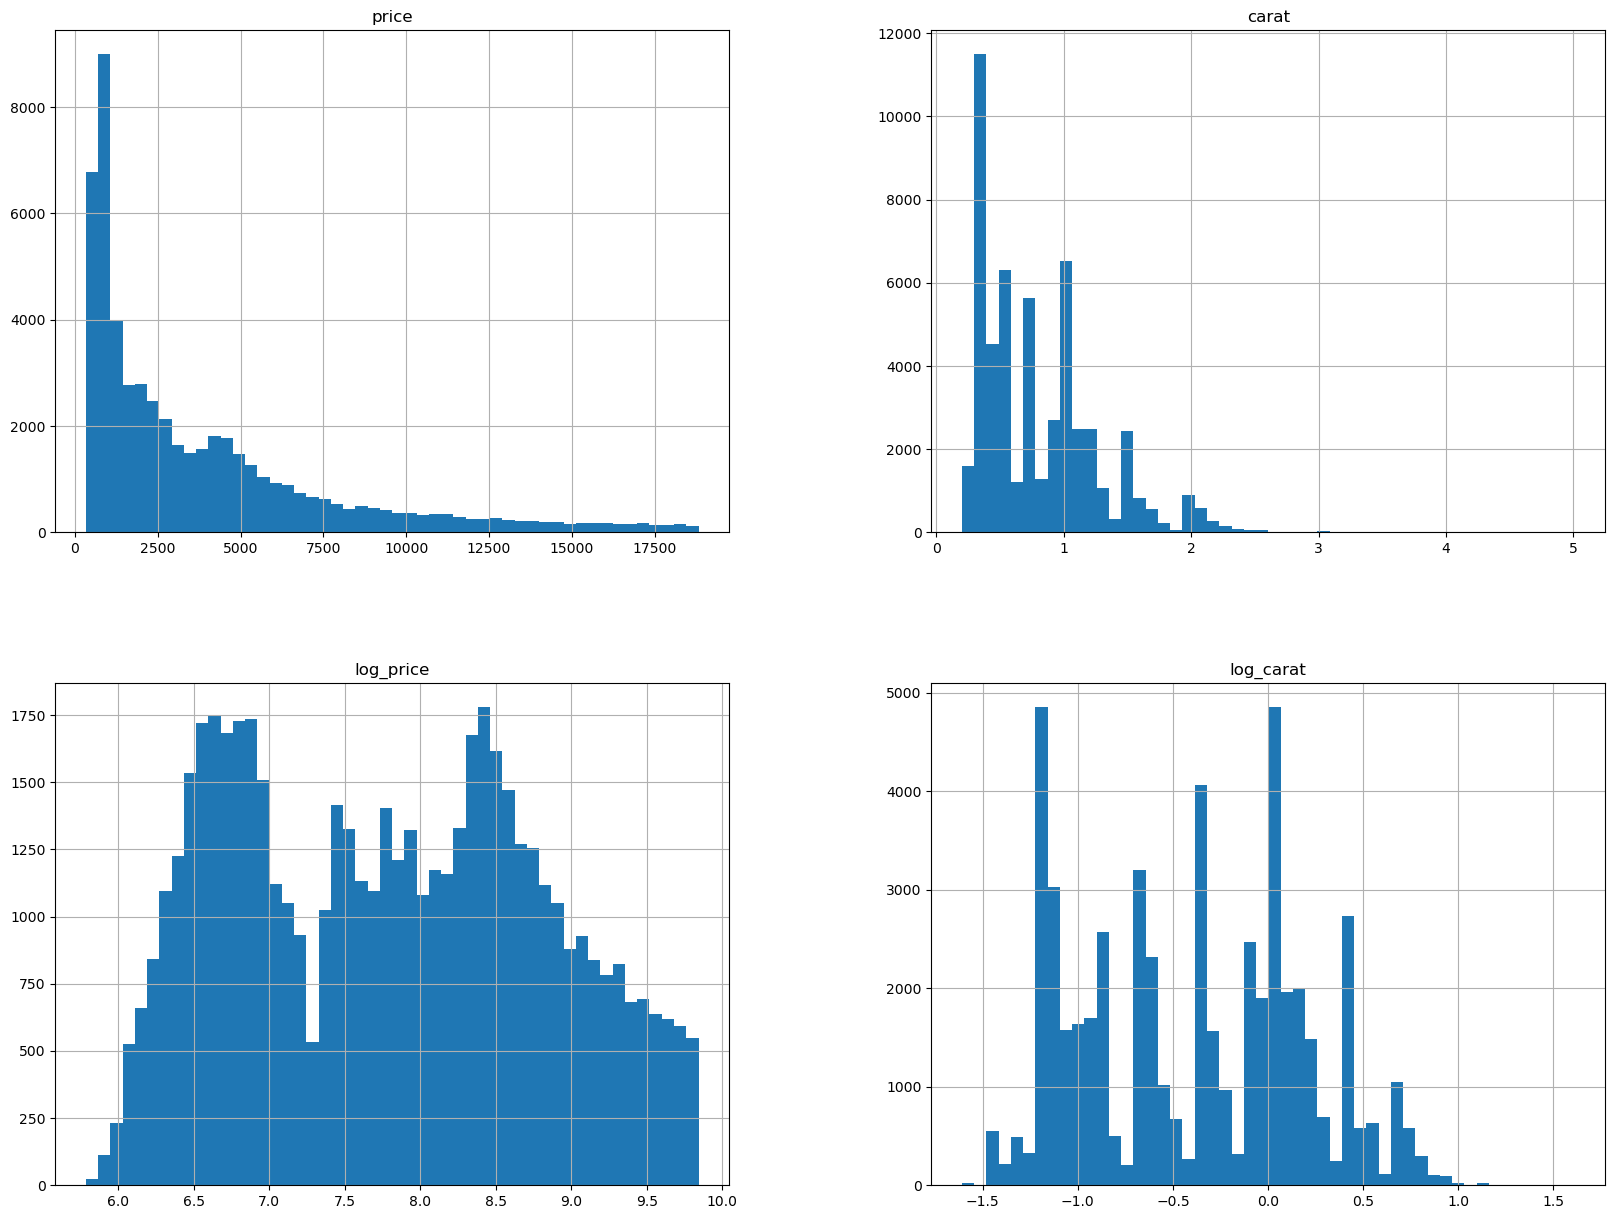

In [12]:
df['log_carat'] = np.log(df['carat'])
df['log_price'] = np.log(df['price'])

df[['price', 'carat',  'log_price','log_carat']].hist(bins=50, figsize=(20, 15))
plt.show()


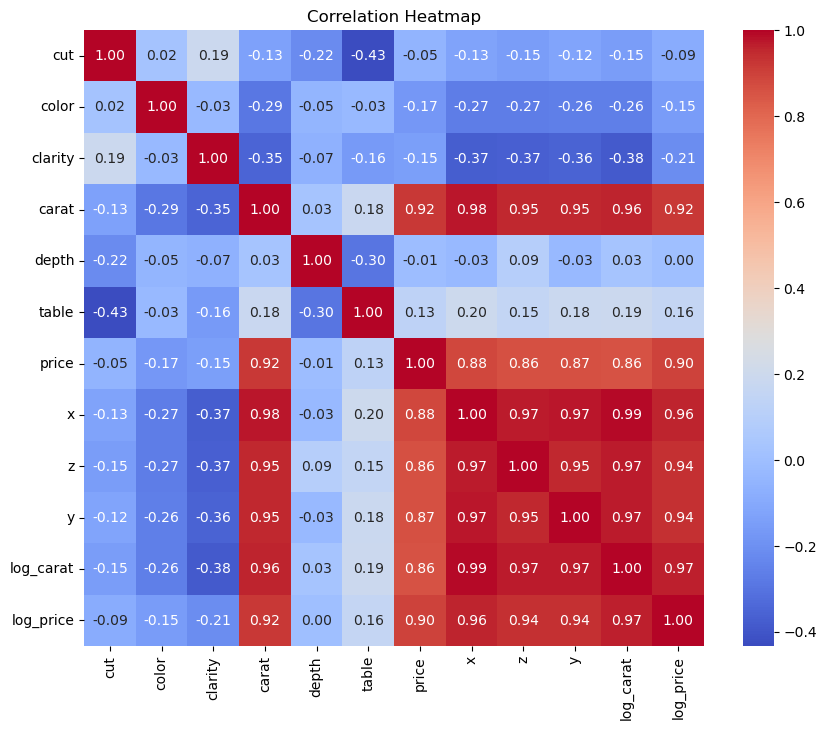

In [13]:
import seaborn as sns

corr_matrix = df.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

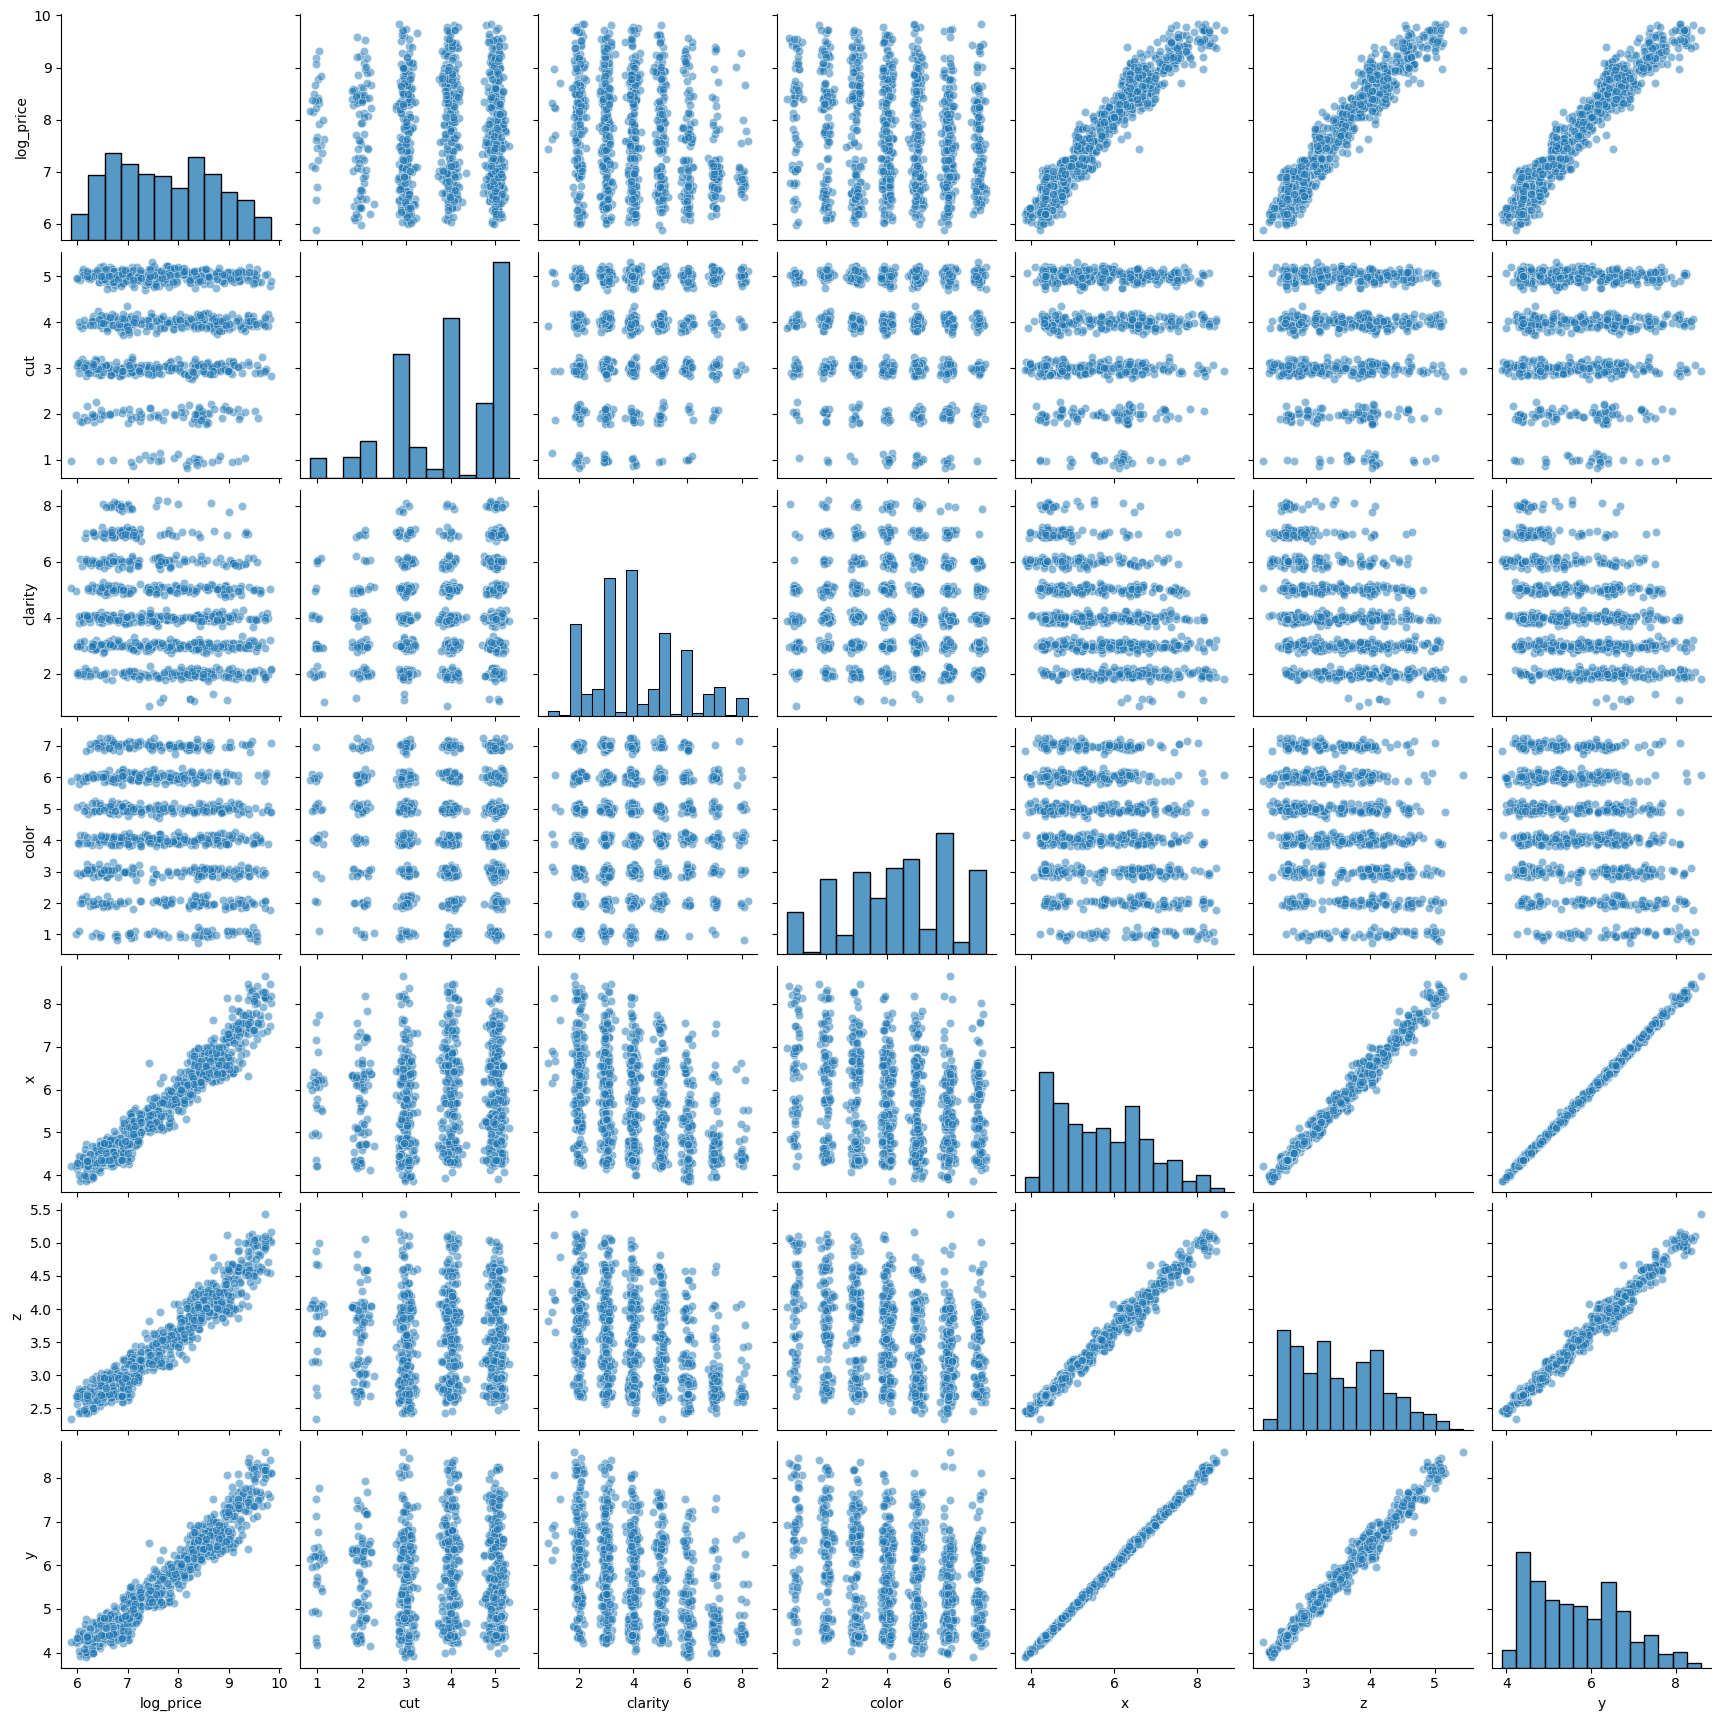

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sampled = df.sample(n=1000, random_state=42)

columns_to_plot = ['log_price', 'cut', 'clarity', 'color', 'x','z', 'y']

# noise to see diffrent values.
df_sampled['cut'] = df_sampled['cut'] + np.random.normal(0, 0.1, df_sampled['cut'].shape)
df_sampled['clarity'] = df_sampled['clarity'] + np.random.normal(0, 0.1, df_sampled['clarity'].shape)
df_sampled['color'] = df_sampled['color'] + np.random.normal(0, 0.1, df_sampled['color'].shape)

sns.pairplot(df_sampled[columns_to_plot], plot_kws={'alpha':0.5})
plt.show()


In [ ]:
print(df[['log_price', 'log_carat','cut', 'clarity', 'color', 'x', 'z', 'y']]
      .describe()
      .to_latex(float_format="%.3f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & log_price & log_carat & cut & clarity & color & x & z & y \\
\midrule
count & 53940.000 & 53940.000 & 53940.000 & 53940.000 & 53940.000 & 53940.000 & 53940.000 & 53940.000 \\
mean & 7.787 & -0.395 & 3.904 & 4.051 & 4.406 & 5.731 & 3.539 & 5.735 \\
std & 1.015 & 0.585 & 1.117 & 1.647 & 1.701 & 1.122 & 0.706 & 1.142 \\
min & 5.787 & -1.609 & 1.000 & 1.000 & 1.000 & 0.000 & 0.000 & 0.000 \\
25% & 6.856 & -0.916 & 3.000 & 3.000 & 3.000 & 4.710 & 2.910 & 4.720 \\
50% & 7.784 & -0.357 & 4.000 & 4.000 & 4.000 & 5.700 & 3.530 & 5.710 \\
75% & 8.580 & 0.039 & 5.000 & 5.000 & 6.000 & 6.540 & 4.040 & 6.540 \\
max & 9.843 & 1.611 & 5.000 & 8.000 & 7.000 & 10.740 & 31.800 & 58.900 \\
\bottomrule
\end{tabular}



In [16]:
df[['cut', 'clarity', 'color', 'log_price', 'log_carat' ,'x','z', 'y']].describe()

,cut,clarity,color,log_price,log_carat,x,z,y
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3.904097,4.051020,4.405803,7.786768,-0.394967,5.731157,3.538734,5.734526
std,1.116600,1.647136,1.701105,1.014649,0.584828,1.121761,0.705699,1.142135
min,1.000000,1.000000,1.000000,5.786897,-1.609438,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,6.856462,-0.916291,4.710000,2.910000,4.720000
50%,4.000000,4.000000,4.000000,7.783641,-0.356675,5.700000,3.530000,5.710000
75%,5.000000,5.000000,6.000000,8.580027,0.039221,6.540000,4.040000,6.540000
max,5.000000,8.000000,7.000000,9.842835,1.611436,10.740000,31.800000,58.900000
